In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
combined_many = pd.read_csv('combined_many.csv')
combined_many2 = pd.read_csv('combined_many2.csv')
featureful = pd.read_csv('featureful.csv')
combined_1 = pd.read_csv('combined_1.csv')
xgboost_6 = pd.read_csv('XGBoost_6.csv')
xgb_optimal = pd.read_csv('XGB_OPTIMAL.CSV')
combined_2 = pd.read_csv('combined_2.csv')
xgb_optimal_knn = pd.read_csv('XGB_OPTIMAL_KNN.csv')
xgboost_3 = pd.read_csv('XGBoost_3.csv')
xgboost_7 = pd.read_csv('XGBoost_7.csv')
knn_3000_800 = pd.read_csv('KNN_3000_800.csv')
after_combined = pd.read_csv('After_combined.csv')

In [3]:
data = pd.DataFrame({'cm' : combined_many['target'],
                     'cm2' : combined_many2['target'],
                     'f' : featureful['target'],
                     'c1' : combined_1['target'],
                     'x6' : xgboost_6['target'],
                     'xo' : xgb_optimal['target'],
                     'c2' : combined_2['target'],
                     'xok' : xgb_optimal_knn['target'],
                     'x3' : xgboost_3['target'],
                     'x7' : xgboost_7['target'],
                     'knn' : knn_3000_800['target'],
                     'ac' : after_combined['target']})

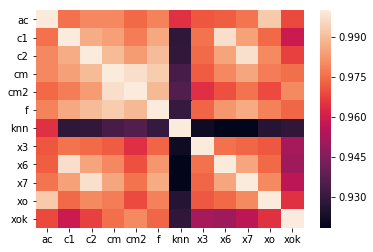

In [4]:
cm = data.corr()
sns.heatmap(cm)
plt.show()

In [5]:
# df = preprocessing.scale(data)
df =  (data - data.mean(axis=0))/data.std(axis=0)
df.head()

,ac,c1,c2,cm,cm2,f,knn,x3,x6,x7,xo,xok
0,-0.416539,-0.294335,-0.397098,-0.380414,-0.339983,-0.394480,-0.362038,-0.214271,-0.300639,-0.410158,-0.431673,-0.519116
1,-0.633861,-0.438104,-0.395355,-0.415831,-0.428705,-0.547863,-0.571538,-0.453844,-0.456155,-0.424891,-0.647518,-0.539210
2,-0.586279,-0.675739,-0.620858,-0.609692,-0.684291,-0.698592,-0.777498,-0.537859,-0.625483,-0.523874,-0.485735,-0.702831
3,-1.180220,-1.165474,-1.150836,-1.169040,-1.191618,-1.131687,-1.233966,-1.130136,-1.160992,-1.096683,-1.128433,-1.267917
4,-0.111970,0.095722,-0.065466,-0.040109,-0.042577,0.043554,-0.285184,-0.014026,0.084147,-0.078679,-0.030604,0.083529


In [6]:
df['max'] = df.max(axis=1)
df['min'] = df.min(axis=1)
df['mean'] = df.mean(axis=1)

In [7]:
lst = ['max', 'min', 'mean']
for l in lst:
    df[l] = df[l]+abs(df[l].min(axis=0))+.1
    df[l] = df[l]/max(1.2, df[l].max(axis=0)+.5)

In [8]:
for l in lst:
    print('Max: {0:.2f}, Min: {1:.2f}'.format(df[l].max(axis=0), df[l].min(axis=0)))

Max: 0.99, Min: 0.00
Max: 0.93, Min: 0.01
Max: 0.98, Min: 0.00


In [9]:
data_test = pd.read_csv('test/test.csv')

sub_max_df = pd.DataFrame({'id': data_test['id'], 'target':df['max']})
sub_min_df = pd.DataFrame({'id': data_test['id'], 'target':df['min']})
sub_mean_df = pd.DataFrame({'id': data_test['id'], 'target':df['mean']})

# Save to file for submission
sub_max_df.to_csv('github_sub_max.csv', index=False)
# sub_min_df.to_csv('sub_min.csv', index=False)
sub_mean_df.to_csv('github_sub_mean.csv', index=False)

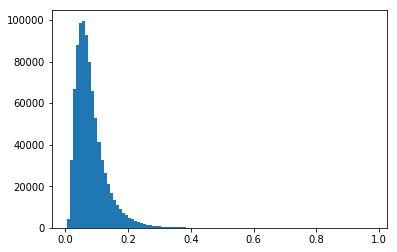

In [10]:
plt.hist(sub_mean_df['target'], bins=100)
plt.show()